## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [12]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

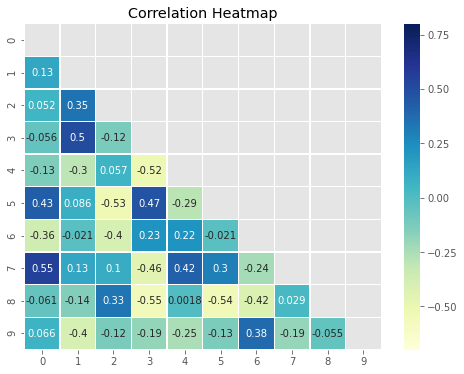

In [13]:
"""
Your Code Here
"""
matrix = (np.random.random((10,10)) - 0.5) * 2
plt.figure(figsize=(8,6))
"""
Your Code Here
"""
heatmap =np.corrcoef(matrix)
mask = np.zeros_like(heatmap)
mask[np.triu_indices_from(mask)] = True
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(heatmap,mask=mask, cmap = "YlGnBu", vmin = -0.7, annot = True, vmax = 0.8, linewidths=0.3,
           )
plt.title('Correlation Heatmap');
plt.show()

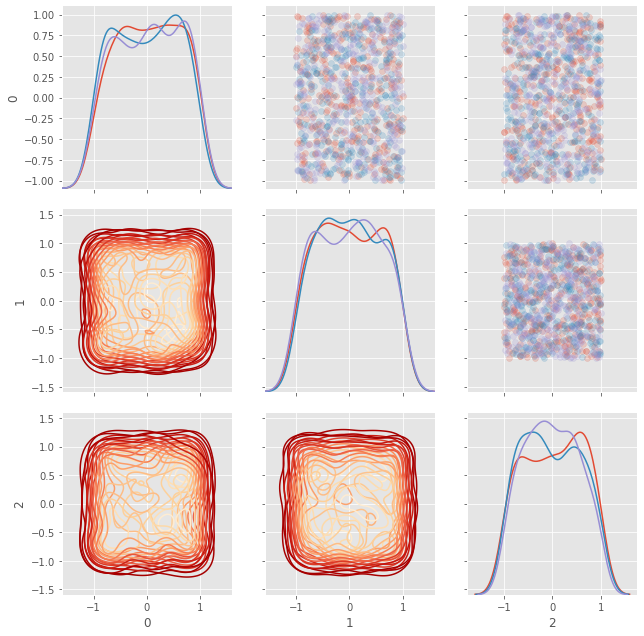

In [14]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = (np.random.random((1000,3)) - 0.5)*2

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter, alpha = 0.2 )
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

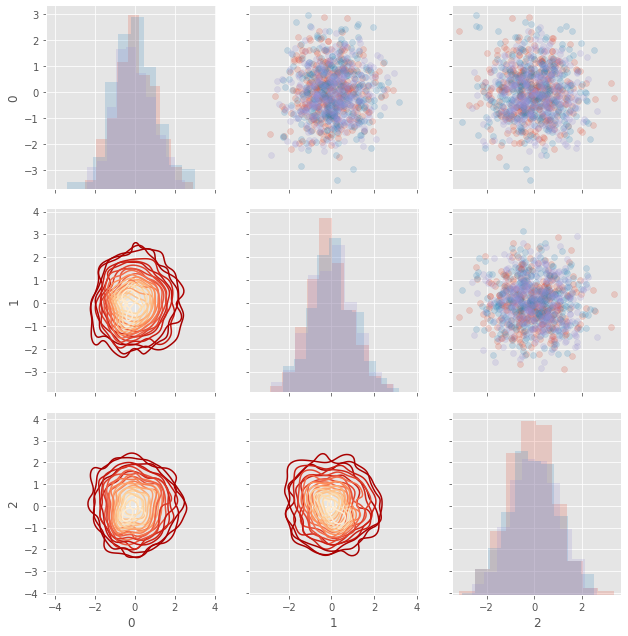

In [17]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.randn(3000).reshape(nrow,ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter, alpha = 0.2 )
grid.map_diag(plt.hist, alpha = 0.2)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()